# Final Report

In [1]:
from TCSPC import *
plt.rcParams['figure.constrained_layout.use'] = True

# !!! IMPORTANT !!! CHECK whether `t`  is `np.arange(0,20,1/19)`, this affects FFT results 

In [2]:
EGFP = Phasor([0.497,0.503],[2.43,3.07])

In [4]:
EGFP.t[1] == 1/19 #check correctness of time array

True

### Continuous phasor

In [ ]:
#  EGFP.generate_df(func=EGFP.phasor_eq_func_cont)

### Discrete, just trimming

In [ ]:
EGFP.generate_df()

### Discrete, FFT deconvolution

In [ ]:
# EGFP.generate_df(deconv =True)

### Discrete, close-form

In [ ]:
EGFP.generate_df(func = EGFP.phasor_eq_func_DFT)

In [23]:
N_i = 20  #n_photon number
N_j = 100 #repeat sim number
n_photon_arr = np.logspace(4,9,N_i).astype(int)
df_p_list = []
for i in range(N_i):
    EGFP.n_photon = n_photon_arr[i]
    EGFP.repeat_sim(N_j)
    df    = EGFP.generate_df(phasor_data = EGFP.phasor_data)[['A1','tau1','tau2','success','nfev']]
    df_bg = EGFP.generate_df(phasor_data = EGFP.phasor_data_bg)[['A1','tau1','tau2','success','nfev']]
    df_cont = EGFP.generate_df(func = EGFP.phasor_eq_func_cont)[['A1','tau1','tau2','success','nfev']]
    df_dis = EGFP.generate_df(func = EGFP.phasor_eq_func_DFT)[['A1','tau1','tau2','success','nfev']]
    df_deconv = EGFP.generate_df(deconv = True)[['A1','tau1','tau2','success','nfev']]
    df_p_list.append([df,df_bg,df_cont,df_dis,df_deconv])

/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:821: RuntimeWarning: overflow encountered in exp
  for i in range(len(phasor_data)):
/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:821: RuntimeWarning: overflow encountered in multiply
  for i in range(len(phasor_data)):
/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:220: RuntimeWarning: invalid value encountered in divide
  phasor = (np.fft.fft(y).T/y_sum).T/np.fft.fft(ker)*np.sum(ker)
/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:820: RuntimeWarning: overflow encountered in exp
  self.df = pd.DataFrame()
/Users/chilaitang/Library/Mobile Documents/com~apple~CloudDocs/UCL PHY/Y3_Group_Project_2B/TCSPC-simulation/TCSPC.py:820: RuntimeWarning: overflow encountered 

In [25]:
def n_case_df(df_list,col):
    '''Return df for cases in df_list
       Input:
       df_list  list of the structure [[df_1,df_2,...df_n_case],...,] (nested list of 20 (n_photon_arr) by n_case)
       col      col names for the cases'''
    df_list_case = []
    for df in df_list:
        n_val_df =pd.concat(df,keys = col,axis = 1) #concat dfs of n cases along axis 1
        df_list_case.append(n_val_df) #append each photon number case
    return pd.concat(df_list_case,keys = range(20)) 

In [28]:
df_p = n_case_df(df_p_list,['no_bg','bg','cont','dis','deconv']) #phasor df for different cases
# df_p.to_csv('df/df_phasor.csv')
idx = pd.IndexSlice

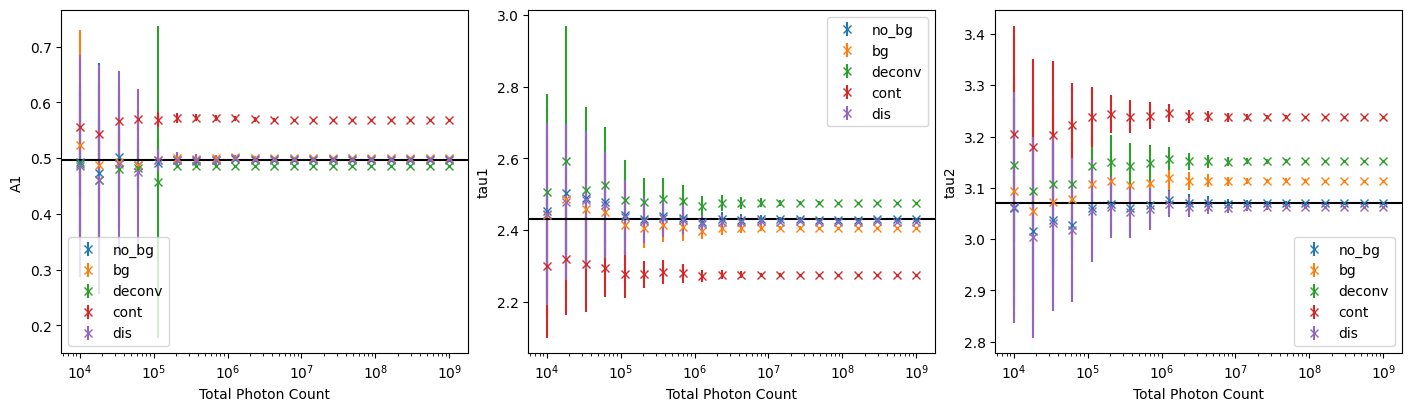

In [82]:
col1,col2 = df_p.columns.levels
fig,ax = plt.subplots(1,3,figsize = (14,4))
for i,par in enumerate(['A1','tau1','tau2']):
    for j,case in enumerate(['no_bg','bg','deconv','cont','dis']):
            mean = df_p.loc(axis=1)[case,par].groupby(level=0).mean()
            std  = df_p.loc(axis=1)[case,par].groupby(level=0).std()
            ax[i].errorbar(n_photon_arr,mean,yerr=std,fmt='x',label = case)
            ax[i].set_xscale('log')
            ax[i].set_xlabel('Total Photon Count')
            ax[i].set_ylabel(par)
            ax[i].legend()
    ax[i].axhline([EGFP.amp[0],*EGFP.tau][i],c='k',label = 'True')
fig.savefig('fig/phasor_params_cases.pdf')
        

In [14]:
N_i = 20  #n_photon number
N_j = 100 #repeat sim number
n_photon_arr = np.logspace(4,9,N_i).astype(int)
lm_method_df_list = []
for i,n_photon in enumerate(n_photon_arr):
    EGFP.n_photon = n_photon
    EGFP.repeat_sim(N_j)
    lm_method_df_list.append(EGFP.val_df(2,sim_data = EGFP.sim_data, method = 'leastsq')) #store dataframe of 100 sims

In [18]:
lm_df = pd.concat(lm_method_df_list,keys = range(20))

In [20]:
#lm_df.to_csv('df/df_lm.csv')#save as lm in the sense of Levenberg Marquardt algorithm

In [30]:
df_mle = pd.read_csv('df/df_mle.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for mle
df_ls  = pd.read_csv('df/df_ls.csv',header=[0, 1], index_col=[0,1] ) #df_ls --df for leastsq
df_phasor   = pd.read_csv('df/df_phasor.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for phasor
df_lm   = pd.read_csv('df/df_lm.csv',index_col=[0,1] ) #df_lm  levenberg marquardts algorithm
df_geo = pd.read_csv('df/geometric_sol_df.csv',header=[0, 1], index_col=[0,1] ) #df gemoetric solution

In [31]:
df_geo

no_bg                              bg                        \
             A1      tau1        tau2        A1      tau1        tau2   
0  0   0.999640  2.740339  100.000000  0.999523  2.739631  100.000000   
   1   0.999859  2.756798  100.000000  0.999743  2.756100  100.000000   
   2   0.916702  2.583994    4.113767  0.950543  2.601895    4.960447   
   3   0.076209  1.100384    2.859261  0.414865  2.204988    3.151193   
   4   0.889710  2.599050    3.822463  0.965030  2.650442    5.329876   
...         ...       ...         ...       ...       ...         ...   
19 95  0.477737  2.416990    3.057329  0.906297  2.625091    4.053909   
   96  0.496021  2.428520    3.069364  0.908762  2.626840    4.075881   
   97  0.509061  2.437886    3.077414  0.911821  2.629704    4.100828   
   98  0.509595  2.438374    3.077487  0.911510  2.629429    4.097466   
   99  0.476966  2.415825    3.057505  0.904878  2.623852    4.044343   

         deconv                            cont                         no_bg  \
             A1      tau1        tau2        A1      tau1        tau2 success   
0  0   1.000121  2.749071  100.000000  1.001609  2.905055   34.103052   False   
   1   0.086987  1.569734    2.649376  0.999960  2.719867  747.734543   False   
   2   0.999634  2.699313  100.000000  0.999952  2.760261   67.199231    True   
   3   1.000024  2.716686  100.000000  0.999933  2.808383   82.583520    True   
   4   0.636350  2.383843    3.224107  0.999922  2.768560   81.546743    True   
...         ...       ...         ...       ...       ...         ...     ...   
19 95  0.760102  2.515333    3.218892  1.000056  2.797927   77.092554    True   
   96  0.765305  2.517031    3.228325  1.000055  2.797843   77.093230    True   
   97  0.742080  2.506268    3.195066  1.000054  2.797843   77.285657    True   
   98  0.747104  2.509983    3.199216  1.000055  2.797875   77.196646    True   
   99  0.751080  2.510287    3.207905  1.000057  2.798205   76.915252    True   

           bg  deconv    cont  
      success success success  
0  0    False   False   False  
   1    False    True   False  
   2     True   False   False  
   3     True   False   False  
   4     True    True   False  
...       ...     ...     ...  
19 95    True    True   False  
   96    True    True   False  
   97    True    True   False  
   98    True    True   False  
   99    True    True   False  

[2000 rows x 16 columns]